In [15]:
/*clear all
set more off
macro drop _all
set seed 8675309

set scheme dubois */

In [1]:
%set graph_format svg

In [2]:
set scheme dubois
set linesize 100
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGI") firstrow clear
quietly label define AGI_lab 1 "$-$30K" 2 "$30K-$48K" 3 "$48K-$75K" 4 "$75K-$110K" 5 "$110K +" 
quietly label values AGI AGI_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

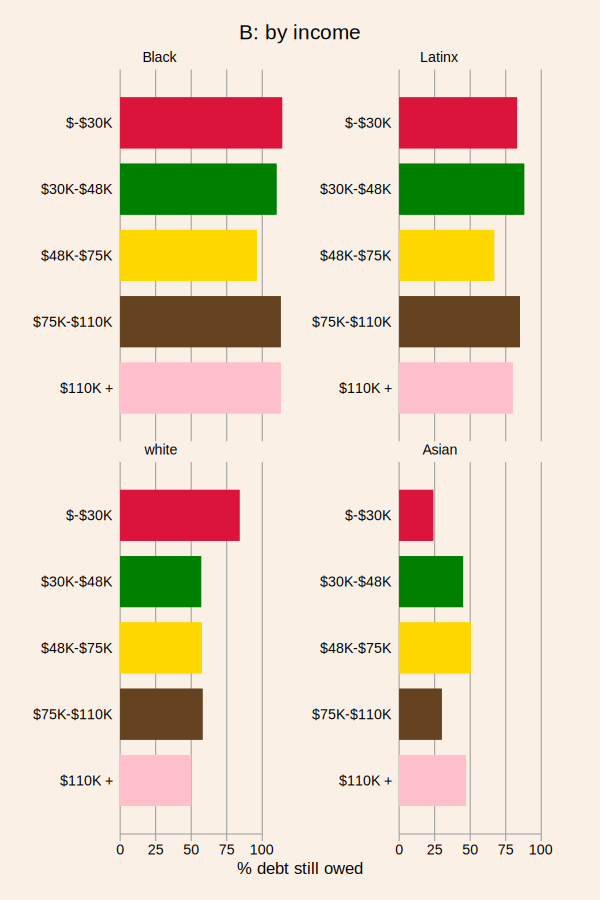

In [3]:
graph hbar Debt_ratio, over(AGI, gap(30)) ytitle("% debt still owed") asyvars showyvars ///
ylabel(0(25)100, labsize(small)) xsize(4) ysize(6)  by(Race_Ethnicity, legend(off) ///
title("B: by income") imargin(zero) ///
note("")) name(AGI, replace)

In [4]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("EFC") firstrow clear
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values EFC EFC_lab
quietly rename Race_Ethnicity RE2
quietly encode RE2, generate(RE3)
quietly recode RE3 (1=4 Asian)(2=1 Black)(3=2 Latinx)(4=3 white), gen(Race_Ethnicity)

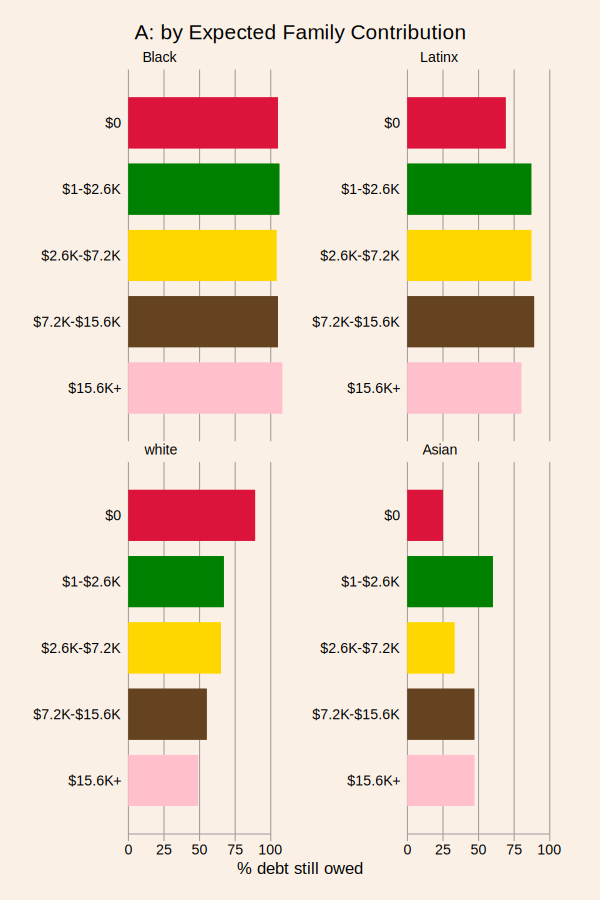

In [5]:
graph hbar Debt_ratio, over(EFC, gap(30)) ytitle(% debt still owed) ylabel(0(25)100, labsize(small)) ///
asyvars showyvars xsize(4) ysize(6)  by(Race_Ethnicity, imargin(zero) legend(off) ///
title("A: by Expected Family Contribution") ///
note("")) name(EFC, replace)

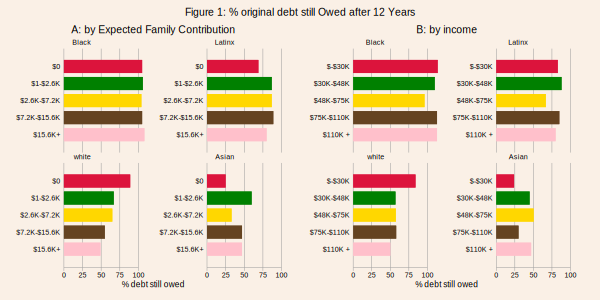

In [6]:
graph combine EFC AGI, imargin(small) iscale(1) ///
title(Figure 1: % original debt still Owed after 12 Years) xsize(8) ysize(4) name(AGIEFC, replace) rows(1)

In [7]:
clear
quietly set obs `=20'
quietly gen race=4
quietly replace race=3 if _n<16
quietly replace race=1 if _n<11
quietly replace race=2 if _n<6
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==2 | _n==7 | _n==12 | _n==17
quietly replace efc=3 if _n==3 | _n==8 | _n==13 | _n==18
quietly replace efc=4 if _n==4 | _n==9 | _n==14 | _n==19
quietly replace efc=5 if _n==5 | _n==10 | _n==15 | _n==20
quietly label define EFC_lab 1 "$0" 2 "$1-$2.6K" 3 "$2.6K-$7.2K" 4 "$7.2K-$15.6K" 5 "$15.6K+" 
quietly label values efc EFC_lab
quietly gen pcthelp=11.6368 if _n==1
quietly replace pcthelp=8.632 if _n==6
quietly replace pcthelp=13.0130 if _n==11
quietly replace pcthelp=9.3606 if _n==16
quietly replace pcthelp=15.2168 if _n==2
quietly replace pcthelp=11.3907 if _n==7
quietly replace pcthelp=15.0896 if _n==12
quietly replace pcthelp=22.6309 if _n==17
quietly replace pcthelp=16.0815 if _n==3
quietly replace pcthelp=7.6035 if _n==8
quietly replace pcthelp=15.4896 if _n==13
quietly replace pcthelp=22.4566 if _n==18
quietly replace pcthelp=21.5403 if _n==4
quietly replace pcthelp=9.5468 if _n==9
quietly replace pcthelp=18.0492 if _n==14
quietly replace pcthelp=. if _n==19
quietly replace pcthelp=25.6239 if _n==5
quietly replace pcthelp=30.1301 if _n==10
quietly replace pcthelp=16.1942 if _n==15
quietly replace pcthelp=. if _n==20
quietly rename race race2
quietly recode race2 (1=1 Black)(2=3 white)(3=2 Latinx)(4=4 Asian), gen(race)

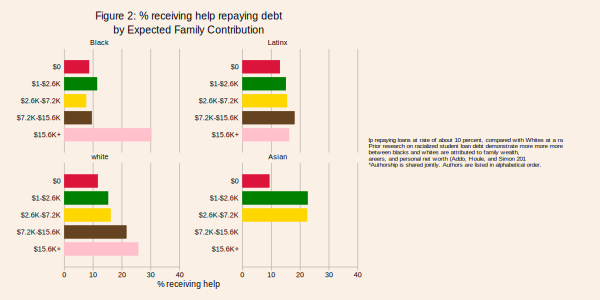

In [8]:
#delimit ;

graph hbar pcthelp, over(efc, gap(30)) ytitle("% receiving help") asyvars showyvars 
xsize(8) ysize(4) ylabel(0(10)40, labsize(small)) by(race, legend(off) imargin(zero)
t2title(Figure 2: % receiving help repaying debt, size(medsmall))
t1title(by Expected Family Contribution, size(medsmall))
note("           "
"lp repaying loans at rate of about 10 percent, compared with Whites at a ra"
"Prior research on racialized student loan debt demonstrate more more more" 
"between blacks and whites are attributed to family wealth," 
"areers, and personal net worth (Addo, Houle, and Simon 201"
"*Authorship is shared jointly. Authors are listed in alphabetical order."
, justification(left) size(vsmall) position(3))) name(PCTHELP, replace) scheme(dubois) ;

#delimit cr

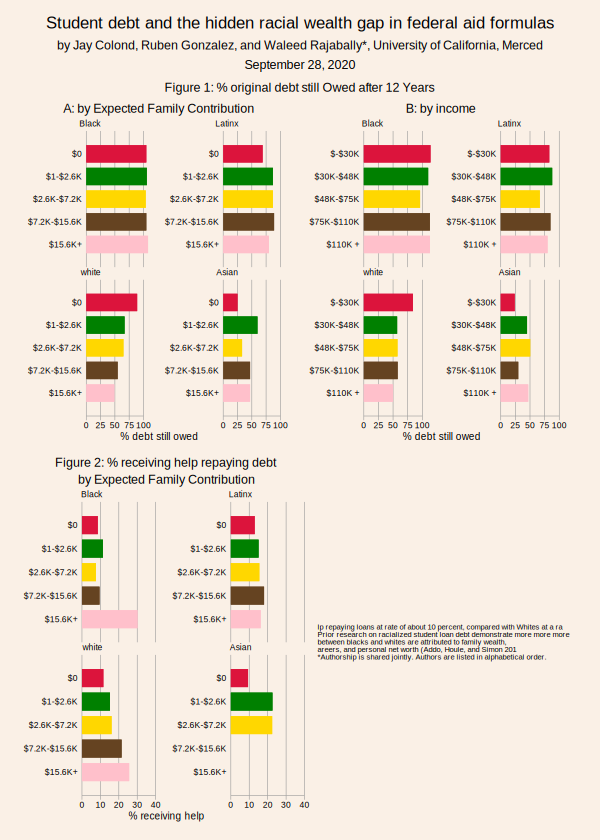

In [9]:
graph combine AGIEFC PCTHELP, ///
title(Student debt and the hidden racial wealth gap in federal aid formulas, size(small)) ///
subtitle("by Jay Colond, Ruben Gonzalez, and Waleed Rajabally*, University of California, Merced", size(vsmall)) ///
t2title("September 28, 2020", size(vsmall)) ///
iscale(.6) rows(2) xsize(10) ysize(14) imargin(small)